In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import datetime as dt
import json
from ast import literal_eval
from random import randint


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve


import warnings
warnings.filterwarnings('ignore')
# Load the dataset
ad = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df=ad.copy()
# Display basic statistics
df.describe()



,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.257200e+05,925720.000000,925720.000000,925720.000000,925720.000000,925720.000000,925720.000000,925709.000000,319701.000000,925709.00000,67237.000000,2260.000000,64.00000,925720.000000,925720.000000
mean,2.184320e+08,1337.490209,10.706168,1117.053020,1.410434,500.838837,29.556653,306.603309,363.561121,500.58263,957.995404,983.952212,991.21875,33.990468,-118.064881
std,1.217689e+07,652.693753,6.101260,610.143266,0.491913,207.530917,21.864761,217.423582,123.655823,207.32356,110.467949,51.997935,27.06985,1.686664,5.846825
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.00000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.104134e+08,900.000000,6.000000,615.000000,1.000000,331.000000,0.000000,101.000000,310.000000,331.00000,998.000000,998.000000,998.00000,34.014500,-118.429800
50%,2.206077e+08,1416.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.00000,998.000000,998.000000,998.00000,34.058700,-118.322200
75%,2.305166e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.00000,998.000000,998.000000,998.00000,34.163900,-118.273900
max,2.499046e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.00000,999.000000,999.000000,999.00000,34.334300,0.000000


In [2]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925715,241605270,02/11/2024 12:00:00 AM,02/11/2024 12:00:00 AM,1920,16,Foothill,1681,2,888,TRESPASSING,...,AA,Adult Arrest,888.0,NaN,NaN,NaN,8700 SHARP AV,NaN,34.2278,-118.4051
925716,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
925717,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
925718,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925720 entries, 0 to 925719
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           925720 non-null  int64  
 1   Date Rptd       925720 non-null  object 
 2   DATE OCC        925720 non-null  object 
 3   TIME OCC        925720 non-null  int64  
 4   AREA            925720 non-null  int64  
 5   AREA NAME       925720 non-null  object 
 6   Rpt Dist No     925720 non-null  int64  
 7   Part 1-2        925720 non-null  int64  
 8   Crm Cd          925720 non-null  int64  
 9   Crm Cd Desc     925720 non-null  object 
 10  Mocodes         796258 non-null  object 
 11  Vict Age        925720 non-null  int64  
 12  Vict Sex        802562 non-null  object 
 13  Vict Descent    802552 non-null  object 
 14  Premis Cd       925709 non-null  float64
 15  Premis Desc     925161 non-null  object 
 16  Weapon Used Cd  319701 non-null  float64
 17  Weapon Des

In [4]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [5]:
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
925715,241605270,02/11/2024 12:00:00 AM,02/11/2024 12:00:00 AM,1920,16,Foothill,1681,2,888,TRESPASSING,...,AA,Adult Arrest,888.0,NaN,NaN,NaN,8700 SHARP AV,NaN,34.2278,-118.4051
925716,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
925717,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
925718,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
925719,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460


In [7]:
df.duplicated().sum()

0

In [8]:
# Count distinct values in every column
distinct_values_count = df.nunique()

# Display the count of distinct values in every column
print("Count of distinct values in every column:")
print(distinct_values_count)


Count of distinct values in every column:
DR_NO             925720
Date Rptd           1553
DATE OCC            1553
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1208
Part 1-2               2
Crm Cd               139
Crm Cd Desc          139
Mocodes           301976
Vict Age             104
Vict Sex               5
Vict Descent          20
Premis Cd            314
Premis Desc          306
Weapon Used Cd        79
Weapon Desc           79
Status                 6
Status Desc            6
Crm Cd 1             141
Crm Cd 2             126
Crm Cd 3              37
Crm Cd 4               6
LOCATION           65412
Cross Street       10112
LAT                 5419
LON                 4976
dtype: int64


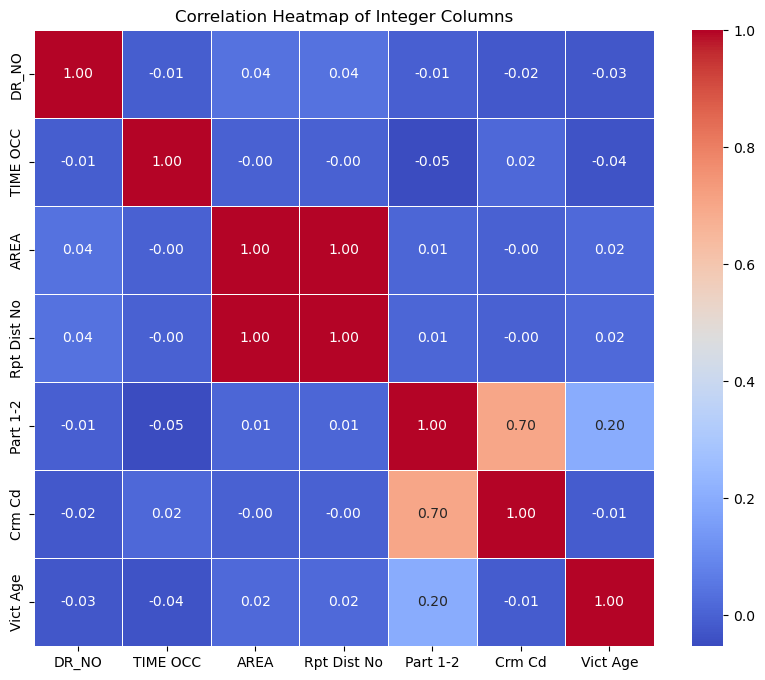

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset


# Select only the integer columns
integer_columns = df.select_dtypes(include=['int64', 'int32'])

# Calculate the correlation matrix
correlation_matrix = integer_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Integer Columns')
plt.show()


In [3]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           129462
Vict Age               0
Vict Sex          123158
Vict Descent      123168
Premis Cd             11
Premis Desc          559
Weapon Used Cd    606019
Weapon Desc       606019
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          858483
Crm Cd 3          923460
Crm Cd 4          925656
LOCATION               0
Cross Street      780494
LAT                    0
LON                    0
dtype: int64

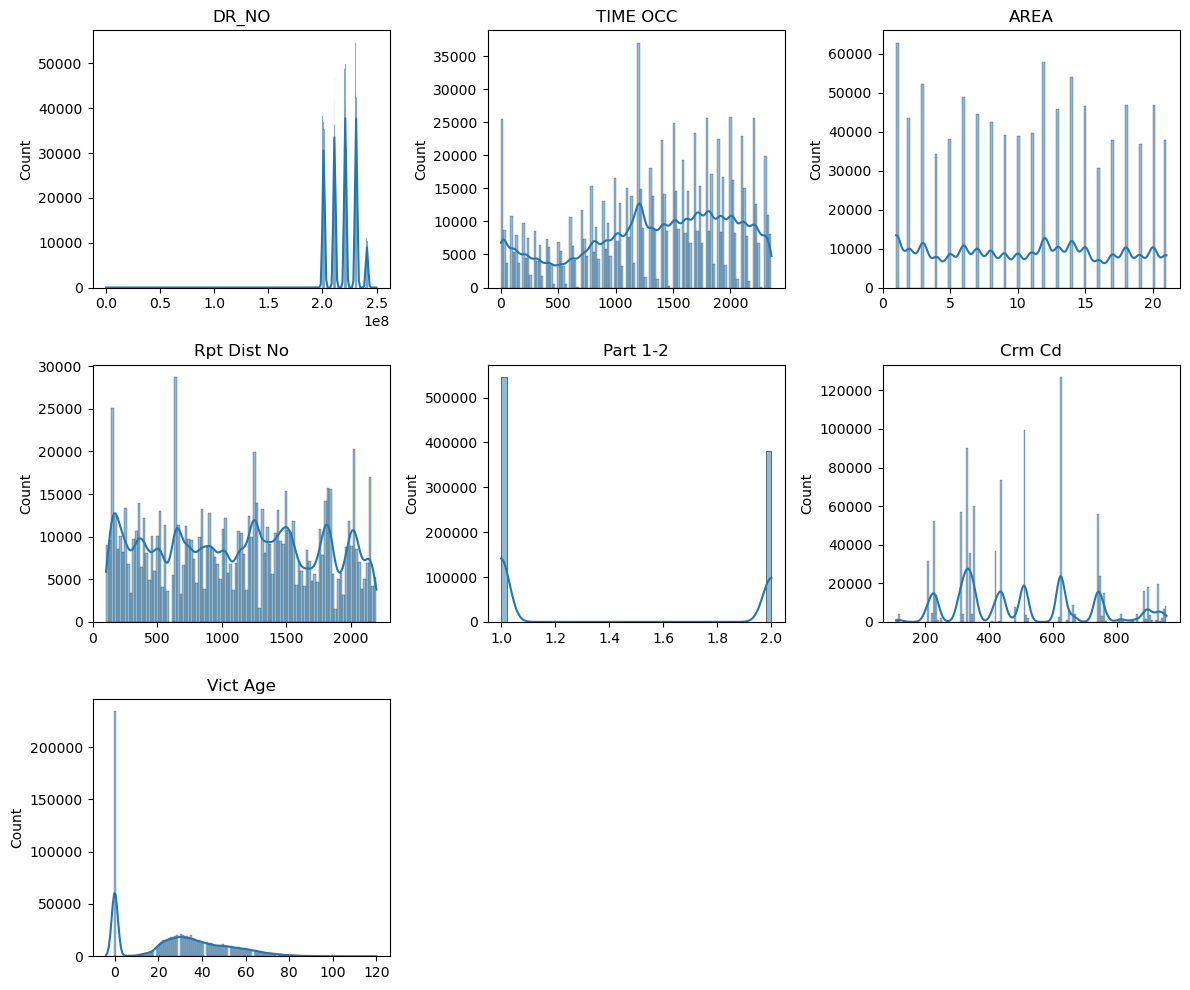

In [10]:
# Select only the integer columns
integer_columns = df.select_dtypes(include=['int64', 'int32'])

# Plot histograms for each integer column
plt.figure(figsize=(12, 10))
for i, col in enumerate(integer_columns.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()



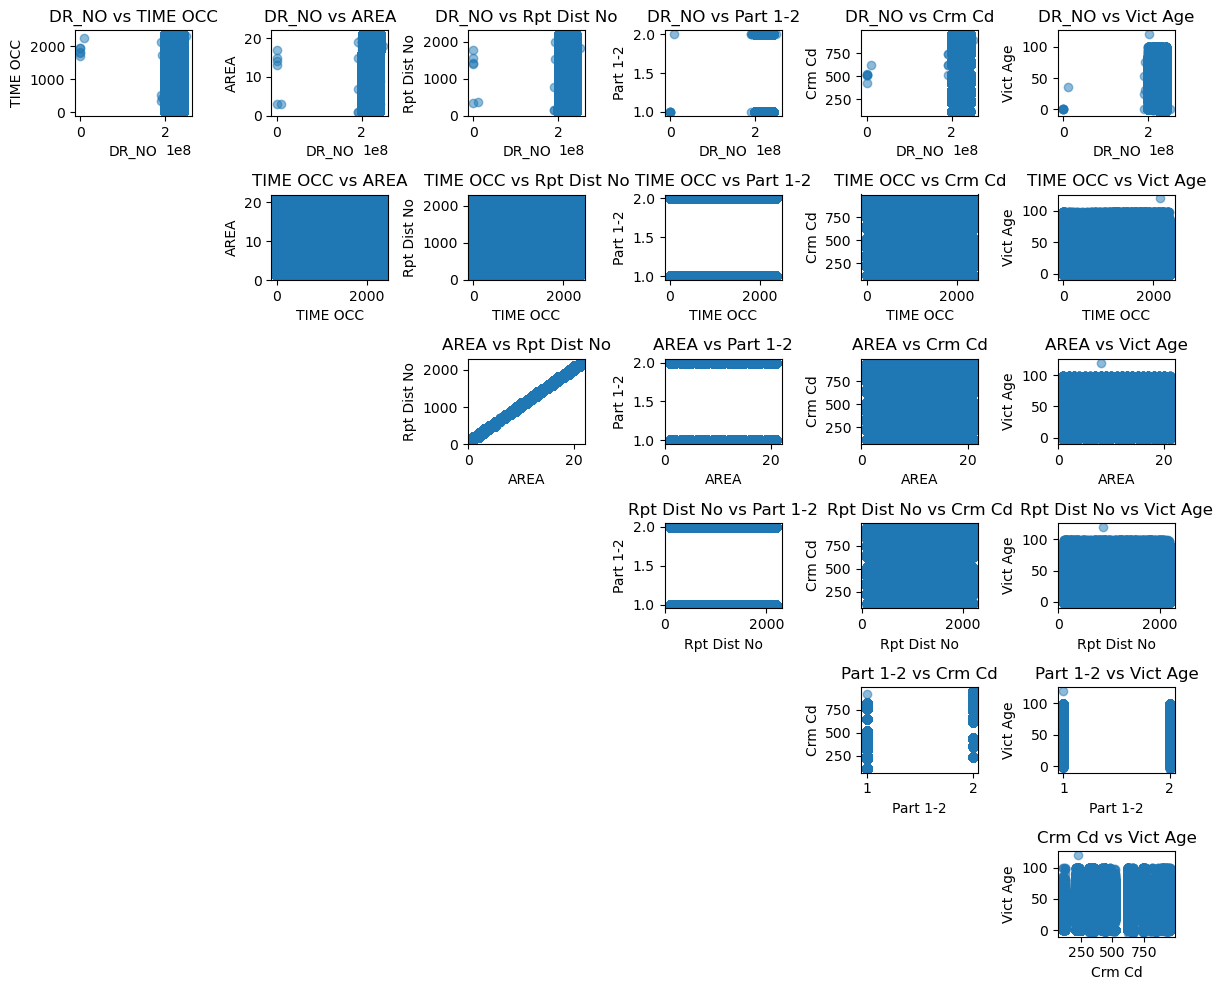

In [11]:
# Plot scatter plots for pairs of integer columns
plt.figure(figsize=(12, 10))
for i in range(len(integer_columns.columns)):
    for j in range(i + 1, len(integer_columns.columns)):
        plt.subplot(len(integer_columns.columns) - 1, len(integer_columns.columns) - 1, (len(integer_columns.columns) - 1) * i + j)
        plt.scatter(df[integer_columns.columns[i]], df[integer_columns.columns[j]], alpha=0.5)
        plt.title(f"{integer_columns.columns[i]} vs {integer_columns.columns[j]}")
        plt.xlabel(integer_columns.columns[i])
        plt.ylabel(integer_columns.columns[j])
plt.tight_layout()
plt.show()

In [4]:
df.drop(['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'], axis=1, inplace=True)


In [5]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['year'] = df['DATE OCC'].dt.year
df['month'] = df['DATE OCC'].dt.month

In [6]:
 df['Vict Sex'].fillna(value='X', inplace=True)

In [7]:
 df['Vict Descent'].fillna(value='X', inplace=True)

In [8]:
 df['Cross Street'].fillna(df['Cross Street'].mode()[0], inplace=True)

In [9]:
 df['Premis Cd'].fillna(df['Premis Cd'].mode()[0], inplace=True)

In [10]:
 df['Crm Cd 1'].fillna(df['Crm Cd 1'].mode()[0], inplace=True)

In [14]:
 df['Mocodes'].fillna(df['Mocodes'].mode()[0], inplace=True)

In [15]:
df['Weapon Used Cd'].fillna(df['Weapon Used Cd'].mode()[0],inplace=True)

In [16]:
# Fill missing values in 'Weapon Desc' using 'Weapon Used Cd'
df['Weapon Desc'].fillna(df['Weapon Used Cd'].map(df.groupby('Weapon Used Cd')['Weapon Desc'].first()), inplace=True)


In [17]:
# Drop rows with null values in 'Weapon Desc' and 'Premis Desc' columns
df.dropna(subset=['Premis Desc'], inplace=True)


In [19]:
occurred = pd.to_datetime(df['DATE OCC'], infer_datetime_format=True)
reported = pd.to_datetime(df['Date Rptd'], infer_datetime_format=True)

df['year'] = occurred.map(lambda x: x.year)
df['month'] = occurred.map(lambda x: x.month)

df = df.drop(columns=['DATE OCC', 'Date Rptd'])

In [21]:
df['hour'] = df['TIME OCC'] // 100

In [23]:
violent = ['BATTERY - SIMPLE ASSAULT', 'INTIMATE PARTNER - SIMPLE ASSAULT', 'CRIMINAL HOMICIDE', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',\
          'DISCHARGE FIREARMS/SHOTS FIRED', 'BATTERY POLICE (SIMPLE)', 'RAPE', 'FORCIBLE BATTERY WITH SEXUAL CONTACT', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',\
          'ROBBERY', 'SHOTS FIRED AT INHABITED DWELLING', 'OTHER ASSAULT', 'KIDNAPPING', 'BRANDISH WEAPON', 'ATTEMPTED ROBBERY']

theft = ['BURGLARY', 'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT OF IDENTITY',\
        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114',\
        'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036',\
        'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 'THEFT, PERSON', 'BURGLARY, ATTEMPTED',\
        'BIKE - STOLEN', 'BUNCO, PETTY THEFT', 'BUNCO, GRAND THEFT', 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',\
        'THEFT PLAIN - ATTEMPT']

vehicular = ['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', \
             'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)', 'VEHICLE - ATTEMPT STOLEN', 'BURGLARY FROM VEHICLE, ATTEMPTED']

df['crime_type'] = df['Crm Cd Desc'].apply(lambda x: 'violent' if x in violent else 'nonviolent')
df['theft'] = df['Crm Cd Desc'].apply(lambda x: 1 if x in theft else 0)
df['vehicular'] = df['Crm Cd Desc'].apply(lambda x: 1 if x in vehicular else 0)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925161 entries, 0 to 925719
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           925161 non-null  int64  
 1   TIME OCC        925161 non-null  int64  
 2   AREA            925161 non-null  int64  
 3   AREA NAME       925161 non-null  object 
 4   Rpt Dist No     925161 non-null  int64  
 5   Part 1-2        925161 non-null  int64  
 6   Crm Cd          925161 non-null  int64  
 7   Crm Cd Desc     925161 non-null  object 
 8   Mocodes         925161 non-null  object 
 9   Vict Age        925161 non-null  int64  
 10  Vict Sex        925161 non-null  object 
 11  Vict Descent    925161 non-null  object 
 12  Premis Cd       925161 non-null  float64
 13  Premis Desc     925161 non-null  object 
 14  Weapon Used Cd  925161 non-null  float64
 15  Weapon Desc     925161 non-null  object 
 16  Status          925161 non-null  object 
 17  Status Desc    

In [28]:
df.columns

Index(['DR_NO', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2',
       'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION',
       'Cross Street', 'LAT', 'LON', 'year', 'month', 'hour', 'crime_type',
       'theft', 'vehicular'],
      dtype='object')

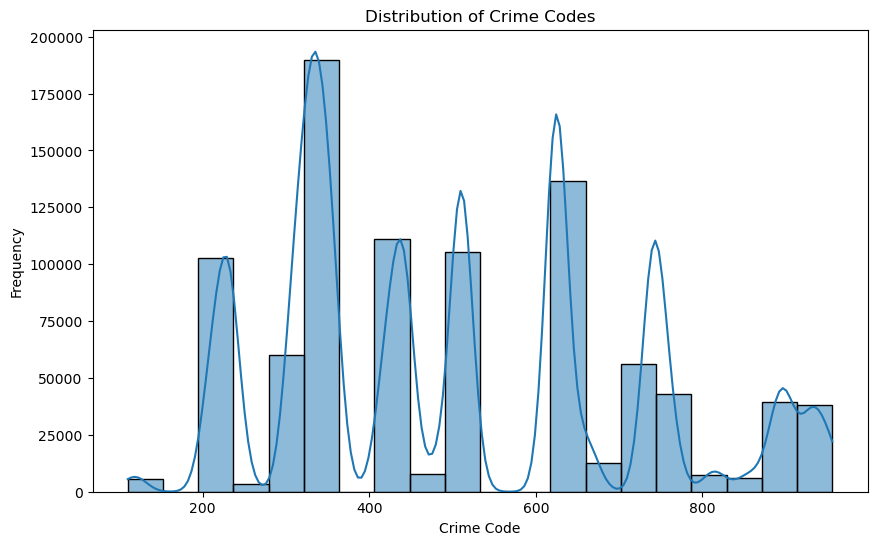

month
1     92064
2     85782
3     85995
4     70509
5     73453
6     73065
7     75621
8     75328
9     72517
10    76059
11    71567
12    73201
dtype: int64


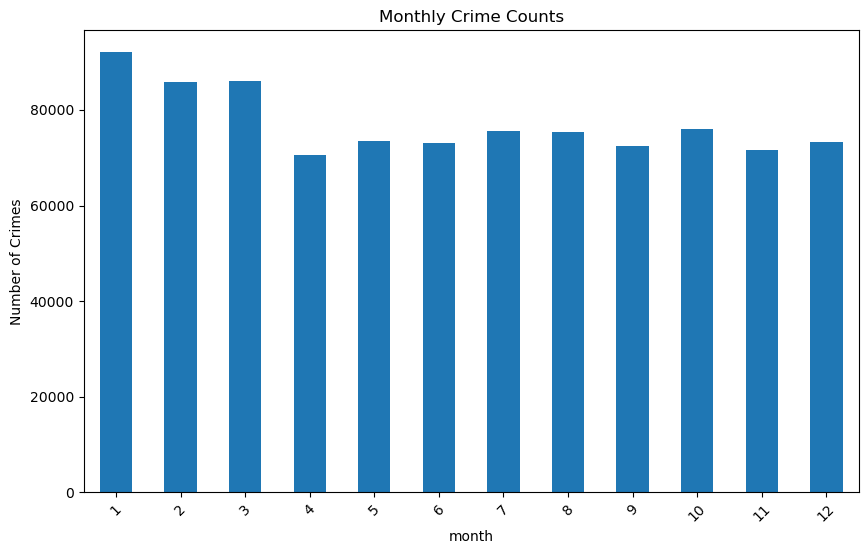

In [29]:
# Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['Crm Cd'], bins=20, kde=True)
plt.title('Distribution of Crime Codes')
plt.xlabel('Crime Code')
plt.ylabel('Frequency')
plt.show()


monthly_crime_counts = df.groupby('month').size()
print(monthly_crime_counts)

# Visualize temporal trends
plt.figure(figsize=(10, 6))
monthly_crime_counts.plot(kind='bar')
plt.title('Monthly Crime Counts')
plt.xlabel('month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


In [31]:

# removing the values ​​below one for the "Vict Age" column

df.drop(df[df['Vict Age'] < 1].index, axis=0, inplace=True)

In [32]:
df

,DR_NO,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,LOCATION,Cross Street,LAT,LON,year,month,hour,crime_type,theft,vehicular
1,200106753,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,...,1000 S FLOWER ST,BROADWAY,34.0444,-118.2628,2020,2,18,nonviolent,0,1
2,200320258,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,...,1400 W 37TH ST,BROADWAY,34.0210,-118.3002,2020,11,17,nonviolent,1,0
3,200907217,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,...,14000 RIVERSIDE DR,BROADWAY,34.1576,-118.4387,2020,3,20,nonviolent,1,0
4,220614831,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,...,1900 TRANSIENT,BROADWAY,34.0944,-118.3277,2020,8,12,nonviolent,1,0
5,231808869,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,1822 0100 0930 0929,41,...,9900 COMPTON AV,BROADWAY,33.9467,-118.2463,2020,12,23,nonviolent,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925714,241605414,1415,16,Foothill,1619,2,354,THEFT OF IDENTITY,1822 1202 0930,62,...,11100 PROVENCE LN,BROADWAY,34.2707,-118.2917,2024,1,14,nonviolent,1,0
925715,241605270,1920,16,Foothill,1681,2,888,TRESPASSING,0913 1202 1501,79,...,8700 SHARP AV,BROADWAY,34.2278,-118.4051,2024,2,19,nonviolent,0,0
925716,241604405,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0400 1822 1310 0416,36,...,8700 LANKERSHIM BL,BROADWAY,34.2271,-118.3878,2024,1,7,nonviolent,0,0
925717,242106032,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0385,44,...,22700 NAPA ST,BROADWAY,34.2260,-118.6214,2024,2,23,nonviolent,0,1


In [35]:
cleaned_df = df.copy()

# Print the shape of the cleaned dataset
print("\nShape of the cleaned dataset after handling null values and removing age less than 1:", cleaned_df.shape)

# Save the cleaned dataset to a new CSV file
cleaned_df.to_csv('cleaned_crime_data.csv', index=False)


Shape of the cleaned dataset after handling null values and removing age less than 1: (691204, 29)


In [37]:
# Victim demographics analysis
# Assuming you have columns for victim age, sex, and descent
victim_demographics = df.groupby(['Vict Age', 'Vict Sex', 'Vict Descent']).size()
print(victim_demographics)


Vict Age  Vict Sex  Vict Descent
2         F         A                1
                    B               55
                    C                1
                    H               98
                    J                1
                                    ..
99        M         O               22
                    W               35
          X         H                1
                    X               12
120       X         X                1
Length: 2792, dtype: int64


In [38]:
# Crime type relationships
# Assuming you have columns for crime codes and descriptions
crime_type_relationships = df.groupby(['Crm Cd', 'Crm Cd Desc']).size()
print(crime_type_relationships)


Crm Cd  Crm Cd Desc                                         
110     CRIMINAL HOMICIDE                                        1511
113     MANSLAUGHTER, NEGLIGENT                                     8
121     RAPE, FORCIBLE                                           3632
122     RAPE, ATTEMPTED                                           313
210     ROBBERY                                                 25109
                                                                ...  
949     ILLEGAL DUMPING                                            44
950     DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01       27
951     DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER       77
954     CONTRIBUTING                                               40
956     LETTERS, LEWD  -  TELEPHONE CALLS, LEWD                  7446
Length: 137, dtype: int64
